In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from utils import *
%matplotlib inline

# Read Image

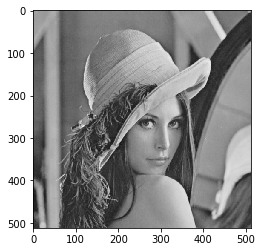

In [2]:
a = cv2.imread('../lena.jpg')
a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
a_double = im2double(a)
#a = cv2.resize(a, (128,128))

my_imshow(a, 'gray')
plt.show()

# Histogram

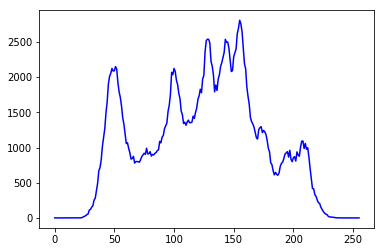

In [3]:
hist,_ = to_hist(a)
plt.plot(hist,'b-')
plt.show()

# Histogram Equalization

In [4]:
def pretty_hist(histogram):
    out = histogram.copy()
    for i, val in enumerate(histogram):
        if i==0 or i==(len(histogram)-1): continue
        if val == 0:
            out[i] = round((histogram[i-1]+histogram[i+1])/2)
            
    return out
            
    

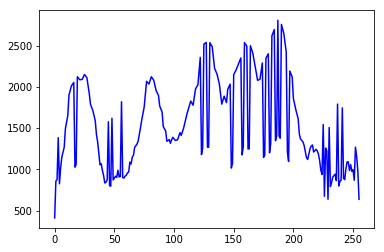

In [5]:
zxc = hist_eq(a)
plt.plot(pretty_hist(zxc[1]),'b-')
plt.show()

# Result

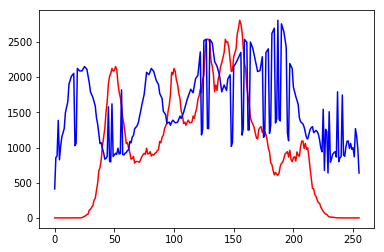

In [6]:
plt.plot(hist, 'r-')
plt.plot(pretty_hist(zxc[1]), 'b-')

plt.show()

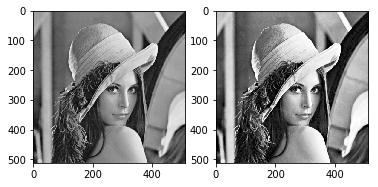

In [7]:
plt.figure(figsize=(6,12))
plt.subplot(121)
plt.imshow(a, cmap='gray')
plt.subplot(122)
plt.imshow(zxc[0], cmap='gray')
plt.show()

# Smoothing

## Box filter

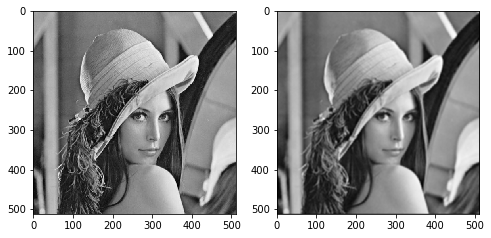

In [8]:
bfil = box_fil(5)
zxc=convolution(a_double, bfil)

plt.figure(figsize=(8,16))
plt.subplot(121)
plt.imshow(a, cmap='gray')
plt.subplot(122)
plt.imshow(zxc, cmap='gray')
plt.show()

## Gaussian filter

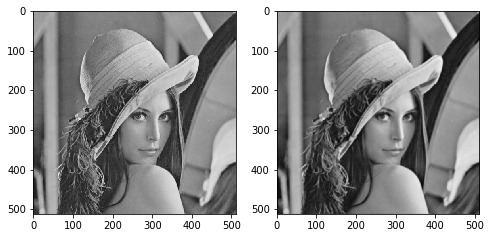

In [9]:
gfil = gaussian_filter(5, 1)
zxc = convolution(a_double, gfil)

plt.figure(figsize=(8,16))
plt.subplot(121)
my_imshow(a, 'gray')
plt.subplot(122)
my_imshow(zxc, 'gray')
plt.show()

## Median filter

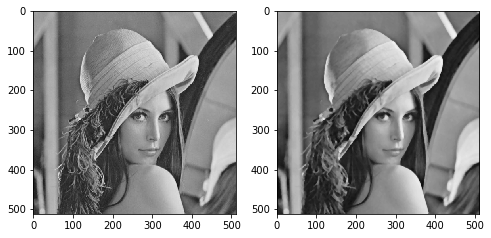

In [10]:
zxc = median(a_double, (5,5))

plt.figure(figsize=(8,16))
plt.subplot(121)
my_imshow(a, 'gray')
plt.subplot(122)
my_imshow(zxc, 'gray')
plt.show()

# Sharpning

## Unsharp

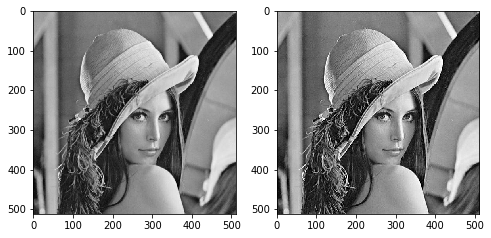

In [11]:
zxc = usNhb(a_double, 5, 1, 1)

plt.figure(figsize=(8,16))
plt.subplot(121)
plt.imshow(a, cmap='gray')
plt.subplot(122)
plt.imshow(zxc,  cmap='gray', vmin=0, vmax=1)
plt.show()

## Laplacian

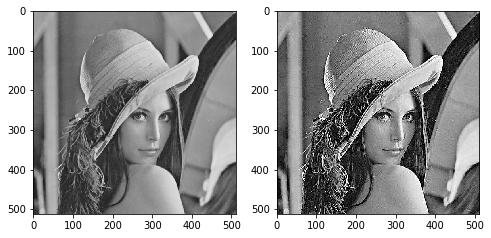

In [12]:
lfil = laplacian(c=1, diagonal=False)
zxc = convolution(im2double(a), lfil)

plt.figure(figsize=(8,16))
plt.subplot(121)
my_imshow(a, 'gray')
plt.subplot(122)
my_imshow(a_double-zxc, 'gray')
plt.show()

## Roberts

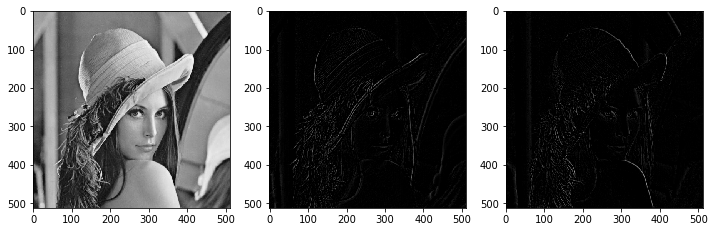

In [13]:
rfil1, rfil2=roberts()
zxc1 = convolution(a_double, rfil1)
zxc2 = convolution(a_double, rfil2)
plt.figure(figsize=(12, 16))
plt.subplot(131)
my_imshow(a_double, 'gray')
plt.subplot(132)
my_imshow(zxc1, 'gray')
plt.subplot(133)
my_imshow(zxc2, 'gray')
plt.show()

## Sobel

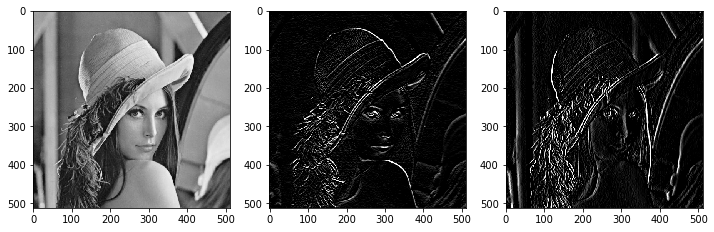

In [14]:
sfil1, sfil2=sobel()
zxc1 = convolution(a_double, sfil1)
zxc2 = convolution(a_double, sfil2)
plt.figure(figsize=(12, 16))
plt.subplot(131)
my_imshow(a_double, 'gray')
plt.subplot(132)
my_imshow(zxc1, 'gray')
plt.subplot(133)
my_imshow(zxc2, 'gray')
plt.show()